# Стратегия взаимодействия с клиентами сети фитнес-центров

## Описание проекта

Задача провести анализ и подготовить план действий по удержанию клиентов.
- прогноз вероятности оттока (на уровне следующего месяца) для каждого клиента;
- формулировка типичных портретов клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
- анализ основные признаки, наиболее сильно влияющие на отток;
- разработка рекомендации по повышению качества работы с клиентами.

## Описание данных
- 'Churn' — факт оттока в текущем месяце;
- Текущие поля в датасете:

    1)Данные клиента за предыдущий до проверки факта оттока месяц:
        - 'gender' — пол;
        - 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
        - 'Partner' — сотрудник компании-партнёра клуба;
        - Promo_friends — факт первоначальной записи в рамках акции «приведи друга»;
        - 'Phone' — наличие контактного телефона;
        - 'Age' — возраст;
        - 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).
    
    2)Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
        - 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
        - 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
        - 'Group_visits' — факт посещения групповых занятий;
        - 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
        - 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
        - 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## План выполнения
- [Выгрузка данных](#step_1) 
- Исследовательский анализ данных (EDA): 
    - [Cредние значения и стандартные отклонения](#step_2) 
    - [Cредние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался](#step_3) 
    - [Гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)](#step_4) 
    - [Матрица корреляции](#step_5) 
- Построение модели прогнозирования оттока клиентов:    
    - [Разбиение данных на обучающую и валидационную выборку](#step_6) 
    - [Обучение модели на train-выборке способом: логистическая регрессия](#step_7) 
    - [Обучение модели на train-выборке способом: случайный лес](#step_8) 
    - [Расчёт метрик accuracy, precision и recall для обеих моделей на валидационной выборке](#step_9) 
- Кластеризация клиентов:    
    - [Визуальная оценка количества кластеров](#step_10) 
    - [Обучение модели кластеризации на основании алгоритма K-Means](#step_11) 
    - [Доля оттока по кластерам](#step_12) 
- [Выводы и рекомендации по работе с клиентами](#step_13) 

### Выгрузка данных

<a id='step_1'></a>

In [1]:
# Импортирование необходимых библиотек
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
from scipy.cluster.hierarchy import dendrogram, linkage 
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('')
data.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [4]:
data.duplicated().sum()

0

In [5]:
data.isna().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

In [6]:
# Привели названия столбцов к нижнему регистру 
columns_list = data.columns.str.lower()
data.columns = columns_list
data.columns

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')

В данных 14 столбцов-признаков и 4000 строк. Пропусков нет. Нет полных дубликатов. Нет нулевых значений.

### Исследовательский анализ данных (EDA)

**Cредние значения и стандартные отклонения**<a id='step_2'></a>

In [7]:
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Средние значения признаков разные: есть значения от 0 до 1, а есть чисоа больше 4.Из-за различных стандартных отклонений для более корректной работы моделей далее необходимо стандартизировать данные.


    
Портрет клиента:

- равновероятно мужчина или женщина;
- живущий(ая) в районе фитнес-центра;
- возможно пришедший(ая) по одной из акций;
- есть телефонный номер для оповещения;
- с абонементом на 3 или 6 месяцев;
- иногда посещает групповые занятия;
- возраст 29 лет;
- третит на другие услуги в фитнес-центре около 146 у.е.;
- ходит в зал около 2 раз в неделю;
- вероятность того, что забросит зал около 25%.


**Cредние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался**<a id='step_3'></a>

In [8]:
data.groupby('churn').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


churn = 1 - те, кто уже не ходит в зал
churn = 0 - те, кто отсались

**Гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток)**<a id='step_4'></a>

Распределение признаков


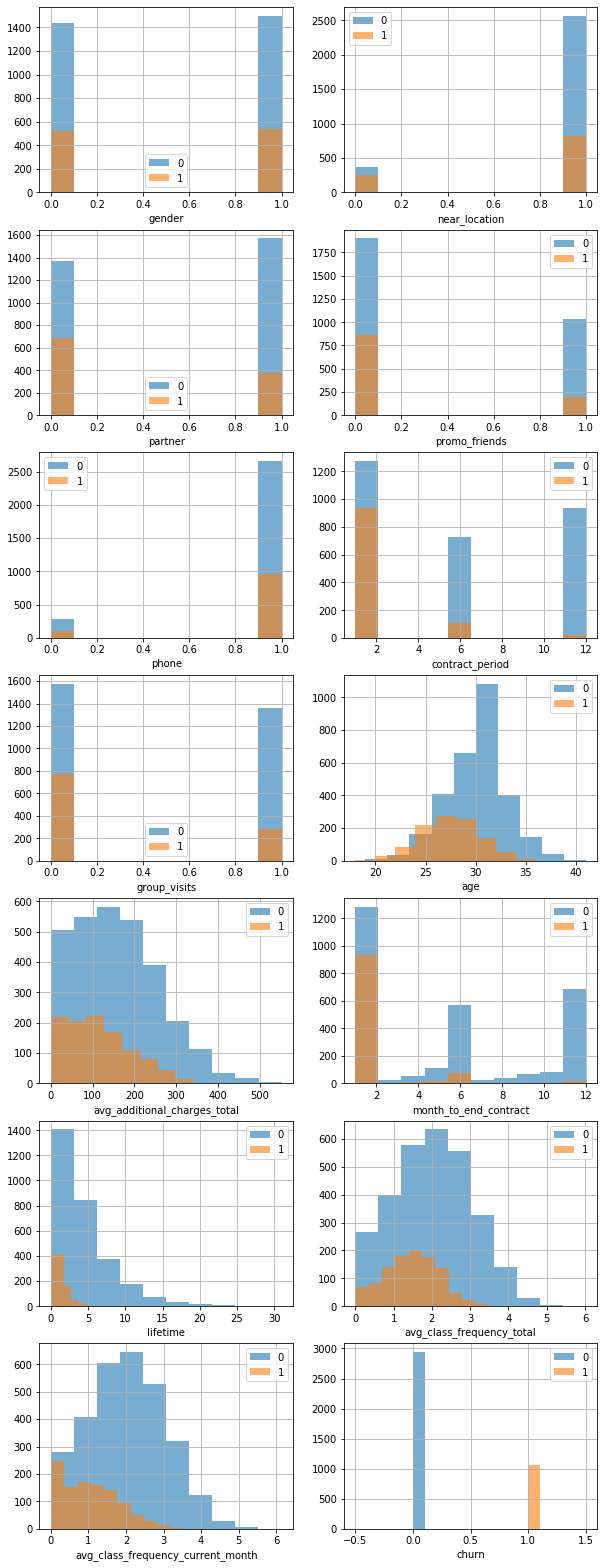

In [9]:
print('Распределение признаков')
fig,axis = plt.subplots(7, 2, figsize=(10, 28))
for idx,col in enumerate(columns_list):
    data[(data['churn'] == 0)][col].hist(alpha = 0.6, ax = axis[idx//2, idx%2], label='0')
    data[(data['churn'] == 1)][col].hist(alpha = 0.6, ax = axis[idx//2, idx%2], label='1')
    axis[idx//2, idx%2].legend()
    axis[idx//2, idx%2].set_xlabel(col)
plt.show()

Сходства и различия:
    
- Мужчины и женщины одинаково отказываются от походов в фитнес-центр;
- клиенты, живущие рядом, лучше ходят     
- 20% людей, пришедших по акциям, бросают ходить;
- клиенты, с короткими абонементами, реже возвращаются;
- групповые занятия позволяют удержать клиентов;
- чаще в отток попадают клиенты младше 30 лет;
- Avg_class_frequency_current_month и Avg_class_frequency_total имеют подобные распределения;
- Month_to_end_contract и Contract_period коррелируют;
- чем дольше клиент ходит в зал, тем меньше вероятность, что он попадёт в отток.    


**Матрица корреляции**<a id='step_5'></a>

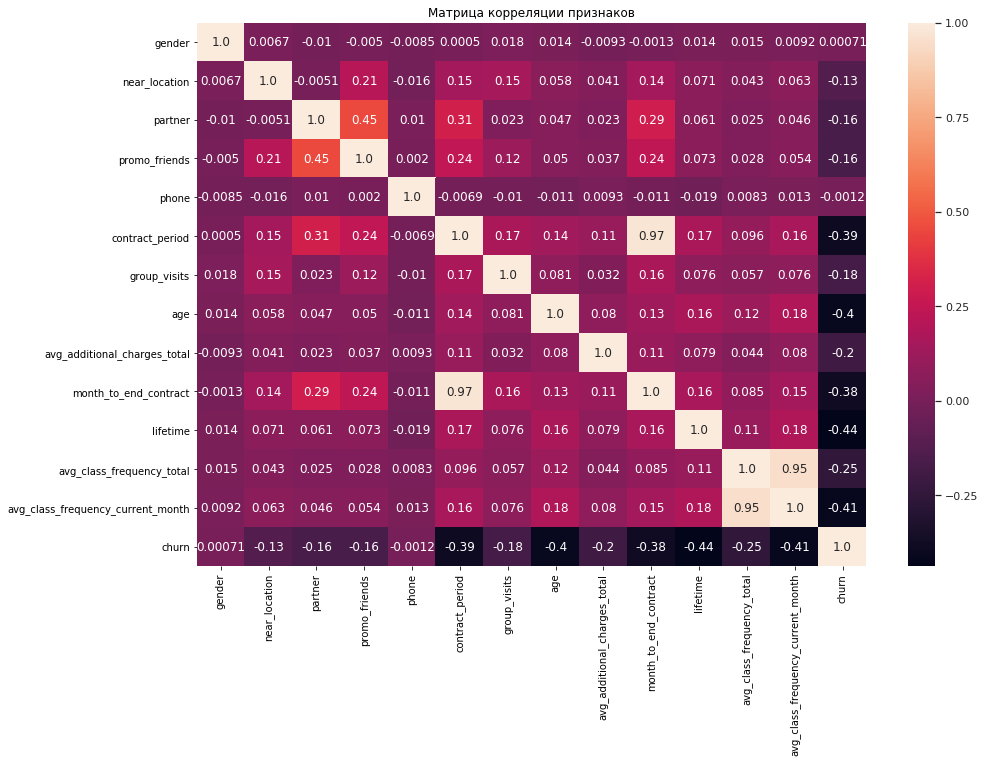

In [10]:
cm = data.corr()  
plt.figure(figsize=(15, 10))
plt.title('Матрица корреляции признаков')
sns.set(style='white')
sns.heatmap(cm, annot = True, fmt='.2', linecolor='gray')
plt.show()

На данных не замечено выбросов.

Явных корреляций признаков с оттоком(>0.6), не наблюдается.

Но есть мультиколлинеарные признаки:
- 'Avg_class_frequency_current_month' и 'Avg_class_frequency_total'
- 'Month_to_end_contract' и 'Contract_period'

От них можно избавиться, оставив один из пары.

In [11]:
data_new = data.drop(['avg_class_frequency_current_month'], axis=1)
data_new = data.drop(['month_to_end_contract'], axis=1)

### Построение модели прогнозирования оттока клиентов

Целевой признак — факт оттока клиента в следующем месяце.

**Разбиение данных на обучающую и валидационную выборку**<a id='step_6'></a>

In [12]:
#разделили наши данные на признаки (матрица X) и целевую переменную (y)
X = data_new.drop(['churn'], axis=1)
y = data_new['churn']

In [13]:
#разделили модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 0,stratify=y)

In [14]:
# Стандартизируем выбору 
scaler = StandardScaler() 

scaler.fit(X_train)

X_train_st = scaler.transform(X_train) 

#применяем стандартизацию к матрице признаков для тестовой выборки
X_test_st = scaler.transform(X_test)

**Обучение модели на train-выборке способом: логистическая регрессия**<a id='step_7'></a>

In [15]:
model_lr = LogisticRegression(random_state = 0) 

In [16]:
model_lr.fit(X_train_st, y_train)
y_pred_lr = model_lr.predict(X_test_st)

**Обучение модели на train-выборке способом: случайный лес**<a id='step_8'></a>

In [17]:
model_rt = RandomForestClassifier(n_estimators = 100,random_state = 0)

In [18]:
model_rt.fit(X_train_st, y_train)
y_pred_rt = model_rt.predict(X_test_st)

**Расчёт метрик accuracy, precision и recall для обеих моделей на валидационной выборке**<a id='step_9'></a>

In [19]:
# функция для выведения метрик
def print_prediction(m, y_test, y_pred):
    print(m)
    print('accuracy:{:.2f} precision:{:.2f} recall:{:.2f} '.format(accuracy_score(y_test, y_pred),
                                                                   precision_score(y_test, y_pred),
                                                                   recall_score(y_test, y_pred)
                                                                  ))

In [20]:
print_prediction(model_lr, y_test, y_pred_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
accuracy:0.94 precision:0.90 recall:0.85 


In [21]:
print_prediction(model_rt, y_test, y_pred_rt)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
accuracy:0.92 precision:0.87 recall:0.80 


Доля правильных ответов выше у модели логистической регрессии.

Точность выше у модели логистической регрессии, чем у случайных лесов

Полнота также выше у модели логистической регрессии.

Из этих метрик следует, что используя модель логистической регрессии мы с большей вероятностью определим уходящего клиента.

### Кластеризация клиентов

**Визуальная оценка количества кластеров**<a id='step_10'></a>

In [22]:
# Стандартизируем выборку целиком
sc = StandardScaler()
X_sc = sc.fit_transform(X)

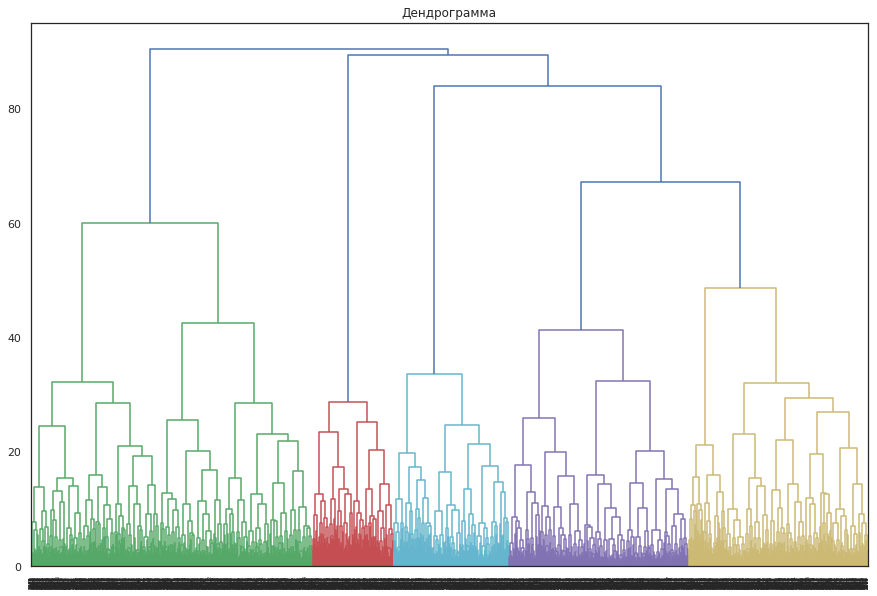

In [23]:
linked = linkage(X_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендрограмма')
plt.show() 

Оптимальное число кластеров 5.

**Обучение модели кластеризации на основании алгоритма K-Means**<a id='step_11'></a>

In [24]:
km = KMeans(n_clusters = 5, random_state = 0)

labels = km.fit_predict(X_sc) 
data_new['cluster_km'] = labels

In [25]:
data_new.groupby('cluster_km').mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,
0,0.478392,0.993970,0.947739,0.879397,1.000000,7.831156,0.536683,29.629146,154.788356,4.447236,1.836547,1.795608,0.102513
1,0.524675,0.862338,0.472727,0.306494,0.000000,4.758442,0.425974,29.283117,144.240418,3.922078,1.846575,1.716160,0.267532
2,0.494515,1.000000,0.240506,0.095359,1.000000,2.483544,0.331646,28.216034,131.341969,2.440506,1.255953,1.030234,0.502110
3,0.568736,0.970067,0.307095,0.097561,0.998891,5.137472,0.483370,30.288248,166.180576,5.011086,2.879208,2.882946,0.041020
4,0.495310,0.000000,0.487805,0.075047,1.000000,2.859287,0.228893,28.566604,136.384285,2.911820,1.674358,1.500208,0.420263


Результат кластеризации: 

- гендер в кластерах распределён равномерно;
- есть кластер где люди все из этого района, и где они не из этого района;
- по акциям люди разделены, видимо, рандомно;
- периоды контракта различны;
- возрастные группы близки друг к другу;
- траты на доп услуги различны, но не сильно;
- различное время с момента обращения в центр, но не близко к максимальным значениям;
- посещяемость в неделю примерно одинакова 1-2 раза, 3-й кластер с 3-мя посещениями.    


Распределение дискретных признаков для кластеров 


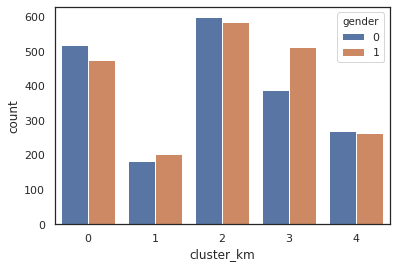

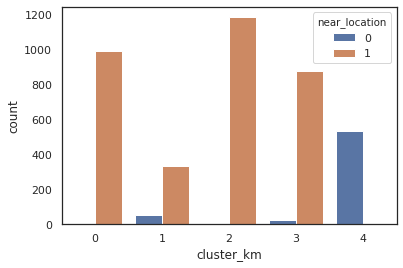

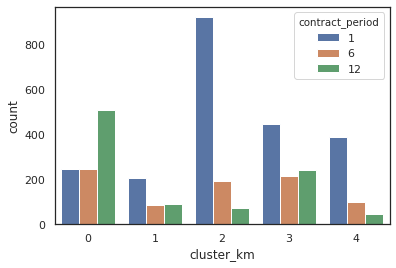

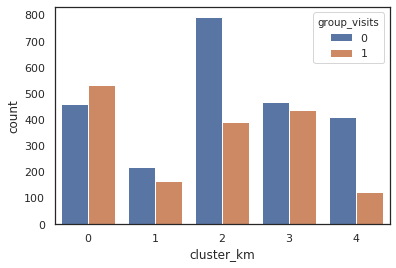

In [26]:
print('Распределение дискретных признаков для кластеров ')
columns_list_short_bars = ['gender', 'near_location', 'contract_period',  'group_visits']
for col in (columns_list_short_bars):
    sns.countplot(data=data_new, x='cluster_km', hue=col)
    plt.show()


Распределение непрерывных признаков для кластеров


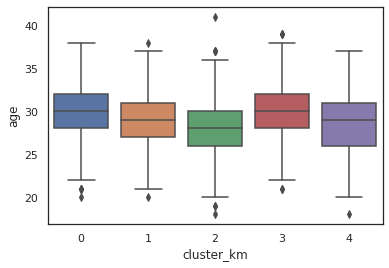

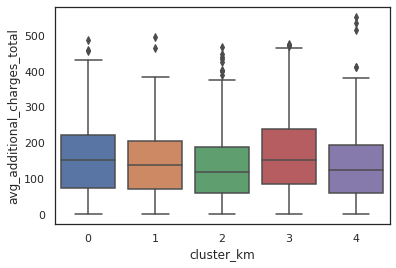

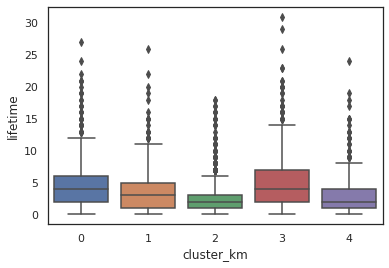

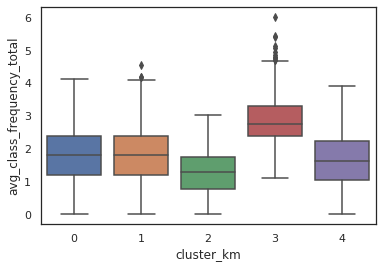

In [27]:
print('Распределение непрерывных признаков для кластеров')
columns_list_short_box = ['age', 'avg_additional_charges_total',  'lifetime','avg_class_frequency_total']
data_new_grouped = data_new.groupby('cluster_km')
for col in (columns_list_short_box):
    sns.boxplot(data=data_new, x='cluster_km', y=col)
    plt.show()


Средние значений некоторых признаков сильно отличаются в кластерах, например, group_visits, lifetime, contract_period, near_location, promo_friends.

Форма распределений признаков в основном похожа по кластерам.

Период абонимента - есть значительное отличие в распределениях, один из факторов разделения по кластерам, полярный параметр для кластеров.

Средняя частота посещений в месяц тоже различна.

Возраст - тоже есть отличие в распределениях по кластерам.

**Профили различных кластеров**

0 кластер: равномерно распределён гендер, клиенты живут рядом, различная длительность абонементов, около 30 лет, доп.услуги на 154 у.е., в основном, обратились около 4 месяцев назад за услугами, посещают 2 раза в неделю зал, 10 процентов оттока; 
    
1 кластер: равномерно распределён гендер, клиенты живут в основном рядом, различная длительность абонементов, около 29 лет, доп.услуги на 144 у.е., в основном, обратились около 4 месяцев назад за услугами, посещают 2 раза в неделю зал, маленький по численности, 26 процентов оттока;  
    
2 кластер: равномерно распределён гендер, клиенты живут рядом, в основном короткие абонименты, около 28 лет, доп.услуги на 131 у.е., в основном, обратились около 2 месяцев назад за услугами, посещают 1 раза в неделю зал, 50 процентов оттока; 
    
3 кластер: почти равномерно распределён гендер, клиенты живут рядом, различная длительность абонементов, около 30 лет, доп.услуги на 166 у.е., в основном, обратились около 5 месяцев назад за услугами, посещают 3 раза в неделю зал, 4 процента оттока;  
    
4 кластер: равномерно распределён гендер, клиенты живут не рядом, больше коротких абонементов, около 28 лет, доп.услуги на 136 у.е., в основном, обратились около 3 месяцев назад за услугами, посещают 1-2 раза в неделю зал, 42 процента оттока;      


**Доля оттока по кластерам**<a id='step_12'></a>

In [28]:
data_new.groupby(['cluster_km'])['churn'].mean()

cluster_km
0    0.102513
1    0.267532
2    0.502110
3    0.041020
4    0.420263
Name: churn, dtype: float64

Доля оттока по кластерам различна. В третьем кластере она выше всего: половина посетителей уходит. А вот в первом и четвёртом кластере уходит 3 и 4 процента посетителей.

### Выводы и рекомендации по работе с клиентами

**Вывод**<a id='step_13'></a>
- проведён анализ полученных данных;
- проведена стандартизация данных;
- проанализированы распределения признаков;
- данные очищены от мультиколинеарных признаков;
- выбрана модель прогназирования оттока клиентов - логистическая регрессия;
- определены метрики accuracy, precision и recall с высокими показателями;
- произведена кластеризация данных;
- отмечены следующие зависимости:
    - люди реже бросают фитнес-клуб если он находится в их районе;
    - чем дольше ходит клиент, тем выше вероятность, что он останется;
    - акция "приведи друга" стимулирует клиентов ходить в центр;
    - клиенты до 30 лет чаще перестают ходить в зал;
    - чем стабильнее клиент ходит в центр в течение недели, тем вероятнее он не забросит;
    - чем короче длительность абонемента, тем выше вероятность потерять клиента. 

**Рекомендации**
- чаще привлекать клиентов из своего района города(листовки в ближайщих дома, раздача у остановок и тп);
- можно попробовать привлечь студентов акциями "по студенческому билету скидка, если вы вдвоём";
- организация марафонов по подготовке к спортивным мероприятиям или к праздникам(клиенты любят быстрый результат);
- мотивация на стабильное посещение "5 занятий проходил, на 6-е скидку на кофе получил";
- мотивировать людей покупать более длительные абонементы(годовой абонемент и полотенца в подарок);
- смс-рассылка с напоминанием о "любимых" групповых занятиях. 